## Problem 2.20

One of these is an impossible electrostatic field. Which one?

In [2]:
import sympy as sp
from sympy import vector
import math
sp.init_printing()
k,a,b,c = sp.symbols('k a b c')
C = vector.CoordSys3D('', vector_names=['x', "y", "z"],
                     variable_names=['x', "y", "z"])

xhat = C.i
yhat = C.j
zhat = C.k
x = C.x
y = C.y
z = C.z

In [2]:
E1 = k*(x*y*xhat+2*y*z*yhat+3*x*z*zhat)
E1

In [3]:
vector.curl(E1)

In [4]:
E2 = k*(y**2*xhat+(2*x*y+z**2)*yhat+2*y*z*zhat)
E2

In [5]:
vector.curl(E2)

This is a possible electrostatic field because it's curl is zero

In [6]:
Ex = E2.dot(xhat+0*yhat+0*zhat)
Ey = E2.dot(0*xhat+yhat+0*zhat)
Ez = E2.dot(0*xhat+0*yhat+zhat)
Vx = -sp.integrate(Ex,(x,0,x)).subs(y,0).subs(z,0)
Vy = -sp.integrate(Ey,(y,0,y)).subs(x,x).subs(z,0)
Vz = -sp.integrate(Ez,(z,0,z)).subs(x,x).subs(y,y)
V = Vx+Vy+Vz
V

In [7]:
sp.simplify(E2)==sp.simplify(-vector.gradient(V))

True

## Problem 2.21

Find the potential inside and outside a uniformly charged solid sphere whose radius is R and total charge is q. Use infinity as your reference point. Compute the gradient of V in each region, and check that it yields the correct field

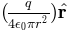

In [8]:
import math
S = vector.CoordSys3D('', vector_names=['r', "\\theta", r"\phi"],
                     variable_names=['r', "\\theta", r"\phi"])
r = S.x
theta = S.y
phi = S.z
rhat = S.i
thetahat = S.j
phihat = S.k
epsilon_0,q,r,pi,R = sp.symbols('epsilon_0 q r pi R')
E_out = (1/(4*pi*epsilon_0))*(q/r**2)*rhat
E_out

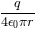

In [9]:
V_out = -sp.integrate(E_out.dot(rhat),(r,math.inf, r))
V_out

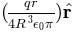

In [10]:
E_in = (q/(4*pi*epsilon_0*R**3))*r*rhat
E_in

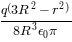

In [11]:
V_in = -sp.integrate(E_out.dot(rhat),(r, math.inf,R))-sp.integrate(E_in.dot(rhat),(r,R,r))
sp.simplify(V_in)

## Problem 2.23

In [12]:
S = vector.CoordSys3D('', vector_names=['r', "\\theta", r"\phi"],
                     variable_names=['r', "\\theta", r"\phi"])
r = S.x
theta = S.y
phi = S.z
rhat = S.i
thetahat = S.j
phihat = S.k
epsilon_0,q,r,pi,a,b,k = sp.symbols('epsilon_0 q r pi a b k')
E1 = 0
E2 = k*(r-a)/(epsilon_0*r**2)
E3 = k*(b-a)/(epsilon_0*r**2)

In [13]:
V = -sp.integrate(E3,(r, math.inf, b))-sp.integrate(E2,(r,b,a))-sp.integrate(E1,(r,a,0))
sp.simplify(V)

## Problem 2.28

Use Equation 2.29 to calculate the potential inside a uniformly charged solid sphere of radius R and total charge q. Compare your results to Problem 2.21

In [2]:
import sympy as sp
from sympy import vector
import math
sp.init_printing()

S = vector.CoordSys3D('', vector_names = ["r", "\\theta", r"\\phi"], variable_names = ["r", "\\theta", r"\\phi"])

r = S.x
theta = S.y
phi = S.z

rhat = S.i
thetahat = S.j
phihat = S.k

epsilon_0, q, r, pi, R, s, rho, theta, phi, z = sp.symbols('epsilon_0 q r pi R s rho theta phi z')

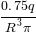

In [3]:
rho = q/((4/3)*pi*R**3)
rho

Convert Equation 2.29 into spherical coordinates

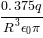

In [4]:
V1 = (1/(4*pi*epsilon_0))*rho*sp.integrate(1, (phi,0,2*pi))
V2 = sp.integrate(r**2, (r, 0, R))
V1

In [5]:
V3 = sp.integrate(sp.sin(theta)/((r**2+z**2-2*r*z*sp.cos(theta))**(0.5)), (theta, 0,pi))
V = V1*V2*V3
sp.simplify(V)

⎧                                          -0.5                           
⎪                                      ⎛ 2⎞                               
⎪                0.125⋅q⋅(-cos(π) + 1)⋅⎝z ⎠                               
⎪                ──────────────────────────────                  for r = 0
⎪                             ε₀⋅π                                        
⎪                                                                         
⎪                                          -0.5                           
⎪                                      ⎛ 2⎞                               
⎨                0.125⋅q⋅(-cos(π) + 1)⋅⎝r ⎠                               
⎪                ──────────────────────────────                  for z = 0
⎪                             ε₀⋅π                                        
⎪                                                                         
⎪        ⎛                   0.5                           0.5⎞           
⎪        ⎜  ⎛ 2          

## Problem 2.34

Find the energy stored in a uniformly charged solid sphere of radius R and charge q. Do it three different ways:

In [6]:
import math
S = vector.CoordSys3D('', vector_names=['r', "\\theta", r"\phi"],
                     variable_names=['r', "\\theta", r"\phi"])
r = S.x
theta = S.y
phi = S.z
rhat = S.i
thetahat = S.j
phihat = S.k
epsilon_0,q,r,pi,a,b,k,rho,R,theta,phi = sp.symbols('epsilon_0 q r pi a b k rho R  theta phi')
E_out = (1/(4*sp.pi*epsilon_0))*(q/r**2)*rhat
E_in = (q/(4*sp.pi*epsilon_0*R**3))*r*rhat
V_in = -sp.integrate(E_out.dot(rhat),(r, math.inf,R))-sp.integrate(E_in.dot(rhat),(r,R,r))
rho = q/((4/3)*sp.pi*R**3)
V_out = -sp.integrate(E_out.dot(rhat),(r,math.inf, r))

a.) W = (1/2) * integral of (rho*V) dtau

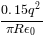

In [7]:
W_a = (1/2)*sp.integrate(rho*V_in*4*sp.pi*r**2,(r,0,R))
W_a

b.) W = (epsilon_0/2) x integral of E^2 dtau

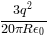

In [8]:
W_b1 = (epsilon_0/2)*(sp.integrate(E_out.dot(rhat)**2*4*sp.pi*r**2,(r,R,math.inf)))
W_b2 = (epsilon_0/2)*sp.integrate(E_in.dot(rhat)**2*4*sp.pi*r**2,(r,0,R))
W_b = W_b1+W_b2
W_b

## Problem 2.48

An inverted hemispherical bowl of radius R carries a uniform surface charge density sigma. Find the potential difference between the "north pole"  and the center. [Answer: (Rsigma/2epsi)(root_2 - 1)]

In [3]:
import math
S = vector.CoordSys3D('', vector_names=['r', "\\theta", r"\phi"],
                     variable_names=['r', "\\theta", r"\phi"])
r = S.x
theta = S.y
phi = S.z
rhat = S.i
thetahat = S.j
phihat = S.k
epsilon_0,q,r,pi,sigma,R,theta = sp.symbols('epsilon_0 q r pi sigma R theta')
V_center = (1/(4*pi*epsilon_0))*(sigma/R)*2*pi*R**2
V_center

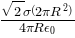

In [4]:
V_pole = (1/(4*sp.pi*epsilon_0))*sigma(2*sp.pi*R**2)/(R*sp.sqrt(2))*sp.integrate(sp.sin(theta)/(sp.sqrt(1-sp.cos(theta))),(theta,0,sp.pi/2))
sp.simplify(V_pole)

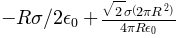

In [5]:
sp.simplify(V_pole-V_center)